In [135]:
from time import time
import numpy as np
import pandas as pd
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [137]:
def read_csv(filename):
    # read revise csv file and print cost time
    t0 = time()
    df = pd.read_csv(filename, error_bad_lines=False)
    print("time for read csv: %.2f" % (time()-t0))
    return df

# preprocess load data

In [176]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_train.feather'
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_train.feather' 

train_df = feather.read_dataframe(path + filename)
# df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 10)

print('load feather %s seconds', format(time() - start_time))


load feather %s seconds 0.44979214668273926


In [177]:
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_test.feather' 
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_test.feather' 
# filename = '0713_april_marketing_anylze_full_table_group12_max_min.feather' 

test_df = feather.read_dataframe(path + filename)
print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 0.837942361831665


In [178]:
test_class_count = test_df.groupby("Groups").count()[test_df.columns[0:1]].values.flatten()

In [179]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [180]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [181]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize



In [182]:
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize


In [183]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [184]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [185]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent_User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No_ignificant_preference', 'Portal', 'Social-media'], dtype=object)

In [186]:
len(train_y)

1507276

In [187]:
len(test_y)

376819

# construct and compile model

In [188]:
classify_num = 11
epochs = 300
batch = 128

# basic config

In [189]:
start_time = time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(256, input_shape=train_x[0].shape ))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

rms = RMSprop()
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])


print('Model compield in {0} seconds'.format(time() - start_time))


Compiling Model ... 
Model compield in 0.181288480758667 seconds


# Train model

In [ ]:
start_time = time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time() - start_time))


Training model...
Train on 1356548 samples, validate on 150728 samples
Epoch 1/300
40s - loss: 2.0073 - acc: 0.2856 - val_loss: 2.0318 - val_acc: 0.2693
Epoch 2/300
39s - loss: 1.9805 - acc: 0.2973 - val_loss: 2.0007 - val_acc: 0.2874
Epoch 3/300
40s - loss: 1.9713 - acc: 0.3002 - val_loss: 2.0534 - val_acc: 0.2672
Epoch 4/300
39s - loss: 1.9381 - acc: 0.3051 - val_loss: 1.9237 - val_acc: 0.3028
Epoch 5/300
39s - loss: 1.9089 - acc: 0.3095 - val_loss: 1.9344 - val_acc: 0.3101
Epoch 6/300


In [ ]:
train_time = time() - start_time

# save model

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


# test model and get accuracy

In [ ]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


In [ ]:
pred = model.predict(test_x)

In [ ]:
model_info = ""
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

# confusion matrix check

In [ ]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

In [ ]:
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    if(sum(cnf_matrix[:,idx]) == 0):
        model_info +=  "\n\n" + str("no test file %s" % (encoder.classes_[idx]))
        print("no test file %s" % (encoder.classes_[idx]))
    else:
        model_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (encoder.classes_[idx], row[idx], test_class_count[idx]))
        model_info +=  "\n\n" + str("predict %s accurancy = %s" % (encoder.classes_[idx], row[idx] / test_class_count[idx]))
        print("class = %s count = [%s / %s]" % (encoder.classes_[idx], row[idx], test_class_count[idx]))
        print("predict %s accurancy = %s" % (encoder.classes_[idx], row[idx] / test_class_count[idx]))
    print()

In [ ]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



# write readme to report the model

In [ ]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

# send mail to alert

In [ ]:
test=mail()
test.main("model finished", md_info)

In [164]:
cnf_matrix_df = pd.DataFrame(cnf_matrix)

In [165]:
cnf_matrix_df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,2,1070,27038,19611,17,0,6070,501,0
1,0,1,5,5359,54862,21846,32,0,5217,296,0
2,0,0,14,1639,35791,32763,30,0,4285,427,0
3,0,0,0,90643,48204,3388,19,0,2823,30,0
4,0,0,36,33520,313815,70704,205,0,6148,271,0
5,0,0,48,11790,265938,141965,277,0,11232,653,0
6,0,0,8,528,55463,47138,178,0,457,14,0
7,0,0,2,4345,40088,10198,6,0,2481,54,0
8,0,0,12,15727,141353,82397,39,0,26348,1090,0
9,0,0,13,7896,57971,21896,10,0,9579,1249,0


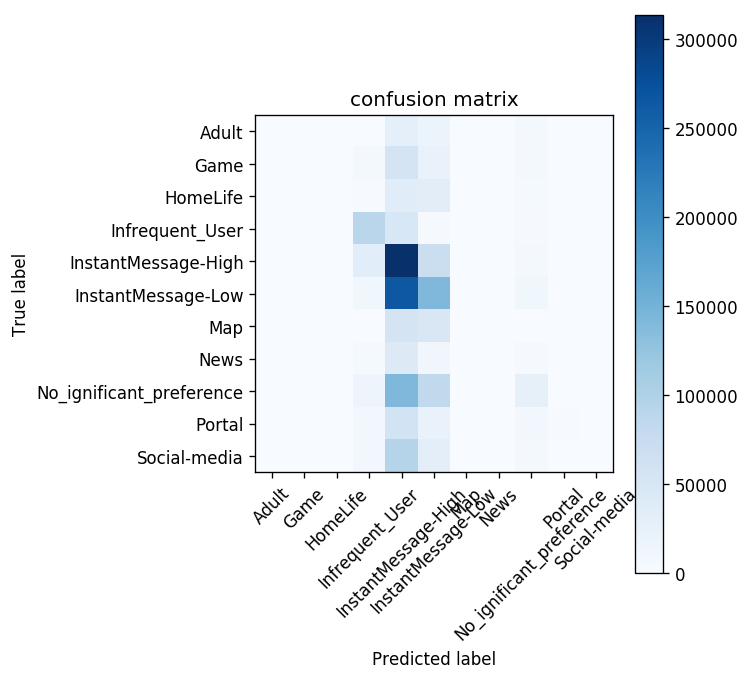

In [166]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [134]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)